In [1]:
import pandas as pd
import os
from matplotlib.colors import LinearSegmentedColormap
from mplsoccer import VerticalPitch, Pitch
from highlight_text import ax_text, fig_text
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from joblib import Parallel, delayed
from tqdm import tqdm

In [2]:
import pandas as pd
folder = 'Data'
archivo = 'WhoScoredTeamNumMatches15Spatial12x8TimeDiv90.csv'

path = os.path.join(folder, archivo)

m1 = pd.read_csv(path)

In [3]:
m1.tail()

,Unnamed: 0,Team,Date,Goals,Number_matches,game_id,Pass_Successful_bin_0_time_0-90,Pass_Unsuccessful_bin_0_time_0-90,Pass_Successful_bin_1_time_0-90,Pass_Unsuccessful_bin_1_time_0-90,...,Error_Successful_bin_91_time_0-90,Error_Unsuccessful_bin_91_time_0-90,Error_Successful_bin_92_time_0-90,Error_Unsuccessful_bin_92_time_0-90,Error_Successful_bin_93_time_0-90,Error_Unsuccessful_bin_93_time_0-90,Error_Successful_bin_94_time_0-90,Error_Unsuccessful_bin_94_time_0-90,Error_Successful_bin_95_time_0-90,Error_Unsuccessful_bin_95_time_0-90
9615,0,Crystal Palace,2024-02-19,1,15,1729483,4.0,13.0,28.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9616,0,Man City,2024-02-20,1,15,1729507,3.0,5.0,25.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9617,0,Brentford,2024-02-20,0,15,1729507,12.0,7.0,22.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9618,0,Liverpool,2024-02-21,4,15,1729340,3.0,4.0,9.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9619,0,Luton,2024-02-21,1,15,1729340,5.0,10.0,20.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
columnas = ["game_id", "Date", "Team1", "Team2", "Goals1", "Goals2"]

stats = m1.columns[6:] # Columnas de estadísticas

for stat in stats:
    columnas.append(f"{stat}_1")
    columnas.append(f"{stat}_2")

In [14]:
matches_data = []

for game_id in tqdm(m1['game_id'].unique(), desc="Processing games"):
    fila = []
    game = m1[m1['game_id'] == game_id]
    fila.append(game_id)
    fila.append(game['Date'].values[0])
    fila.append(game['Team'].values[0])
    fila.append(game['Team'].values[1])
    fila.append(game['Goals'].values[0])
    fila.append(game['Goals'].values[1])

    for i in range(len(stats)):
        fila.append(game[stats[i]].values[0])
        fila.append(game[stats[i]].values[1])

    matches_data.append(fila)

matches_columns = columnas
matches = pd.DataFrame(matches_data, columns=matches_columns)

Processing games: 100%|██████████| 4810/4810 [21:34<00:00,  3.72it/s]


In [15]:
matches.tail()


,game_id,Date,Team1,Team2,Goals1,Goals2,Pass_Successful_bin_0_time_0-90_1,Pass_Successful_bin_0_time_0-90_2,Pass_Unsuccessful_bin_0_time_0-90_1,Pass_Unsuccessful_bin_0_time_0-90_2,...,Error_Unsuccessful_bin_93_time_0-90_1,Error_Unsuccessful_bin_93_time_0-90_2,Error_Successful_bin_94_time_0-90_1,Error_Successful_bin_94_time_0-90_2,Error_Unsuccessful_bin_94_time_0-90_1,Error_Unsuccessful_bin_94_time_0-90_2,Error_Successful_bin_95_time_0-90_1,Error_Successful_bin_95_time_0-90_2,Error_Unsuccessful_bin_95_time_0-90_1,Error_Unsuccessful_bin_95_time_0-90_2
4805,1729316,2024-02-18,Brighton,Sheff Utd,4,1,2.0,7.0,5.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4806,1729485,2024-02-18,Luton,Man Utd,1,2,3.0,10.0,10.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4807,1729483,2024-02-19,Everton,Crystal Palace,1,1,4.0,4.0,9.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4808,1729507,2024-02-20,Man City,Brentford,1,0,3.0,12.0,5.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4809,1729340,2024-02-21,Liverpool,Luton,4,1,3.0,5.0,4.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# ML

In [16]:
results = []

for index in matches.index:

    match = matches.loc[index]
    if match["Goals1"] > match["Goals2"]:
        results.append(1)
    elif match["Goals1"] < match["Goals2"]:
        results.append(2)
    else:
        results.append(0)

matches["result"] = results

In [17]:
for i in range(0,3):
    cantidad = matches[matches["result"]==i].shape[0]
    print(f"Resultado {i}, hay: {cantidad} partidos, {cantidad*100/len(matches)}%")

Resultado 0, hay: 1161 partidos, 24.137214137214137%
Resultado 1, hay: 1865 partidos, 38.773388773388774%
Resultado 2, hay: 1784 partidos, 37.08939708939709%


In [18]:
result = matches["result"]
matches = matches.drop(columns = ["game_id", "Date", "Team1", "Team2", "Goals1", "Goals2", "result"])

,Pass_Successful_bin_0_time_0-90_1,Pass_Successful_bin_0_time_0-90_2,Pass_Unsuccessful_bin_0_time_0-90_1,Pass_Unsuccessful_bin_0_time_0-90_2,Pass_Successful_bin_1_time_0-90_1,Pass_Successful_bin_1_time_0-90_2,Pass_Unsuccessful_bin_1_time_0-90_1,Pass_Unsuccessful_bin_1_time_0-90_2,Pass_Successful_bin_2_time_0-90_1,Pass_Successful_bin_2_time_0-90_2,...,Error_Unsuccessful_bin_93_time_0-90_1,Error_Unsuccessful_bin_93_time_0-90_2,Error_Successful_bin_94_time_0-90_1,Error_Successful_bin_94_time_0-90_2,Error_Unsuccessful_bin_94_time_0-90_1,Error_Unsuccessful_bin_94_time_0-90_2,Error_Successful_bin_95_time_0-90_1,Error_Successful_bin_95_time_0-90_2,Error_Unsuccessful_bin_95_time_0-90_1,Error_Unsuccessful_bin_95_time_0-90_2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
X = matches.to_numpy()
scaler = preprocessing.StandardScaler()
X_escalados = scaler.fit_transform(X)
y = result

In [20]:
y.unique()

array([2, 0, 1], dtype=int64)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_escalados, y, test_size=0.3, random_state = 1, stratify=y)

# Modelo 1: Regresión Logística

In [22]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression(max_iter = 1000)
logistic_reg.fit(X_train, y_train)

predicted_logistic_reg = logistic_reg.predict(X_test)
print("Clasification report")
print(classification_report(y_test, predicted_logistic_reg))

Clasification report
              precision    recall  f1-score   support

           0       0.24      0.23      0.24       348
           1       0.47      0.49      0.48       560
           2       0.44      0.43      0.44       535

    accuracy                           0.41      1443
   macro avg       0.38      0.38      0.38      1443
weighted avg       0.40      0.41      0.40      1443



In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


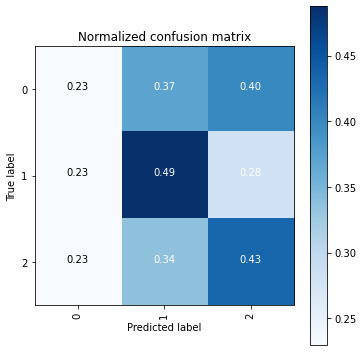

In [24]:
cnf_matrix = confusion_matrix(y_test, predicted_logistic_reg)
np.set_printoptions(precision=2)
classes = np.unique(y)
# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True, title='Normalized confusion matrix')

plt.show()

## SVM

In [25]:
from sklearn.svm import SVC

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    svm = SVC(kernel = kernel)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        f"For kernel = {kernel}, the accuracy is: {acc}"
    )


For kernel = linear, the accuracy is: 0.3832293832293832
For kernel = poly, the accuracy is: 0.46846846846846846
For kernel = rbf, the accuracy is: 0.4934164934164934
For kernel = sigmoid, the accuracy is: 0.4781704781704782


In [26]:
from sklearn.svm import SVC

svm = SVC(kernel = "rbf")

svm.fit(X_train, y_train)

predicted_svm = svm.predict(X_test)
print("Clasification report")
print(classification_report(y_test, predicted_svm))

Clasification report
              precision    recall  f1-score   support

           0       0.22      0.03      0.06       348
           1       0.51      0.65      0.57       560
           2       0.50      0.63      0.55       535

    accuracy                           0.49      1443
   macro avg       0.41      0.44      0.39      1443
weighted avg       0.43      0.49      0.44      1443



Normalized confusion matrix


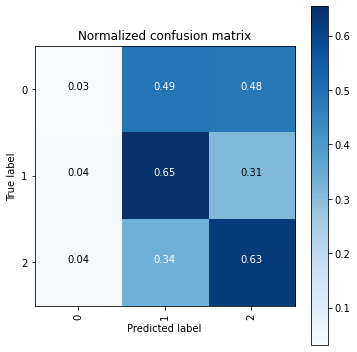

In [27]:
cnf_matrix = confusion_matrix(y_test, predicted_svm)
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True, title='Normalized confusion matrix')

plt.show()

## Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

range_T = [50, 100, 200, 500, 1000]


for t_ in range_T:
    clf = RandomForestClassifier(min_samples_split=50, n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For min_samples_split = 50 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

for t_ in range_T:
    clf = RandomForestClassifier(min_samples_split=20, n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For min_samples_split = 20 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

for t_ in range_T:
    clf = RandomForestClassifier(min_samples_split=10, n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For min_samples_split = 10 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = RandomForestClassifier(min_samples_split=5, n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For min_samples_split = 5 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


For min_samples_split = 50 and t = 50 The accuracy is : 0.4941094941094941
For min_samples_split = 50 and t = 100 The accuracy is : 0.49965349965349964
For min_samples_split = 50 and t = 200 The accuracy is : 0.49757449757449757
For min_samples_split = 50 and t = 500 The accuracy is : 0.5017325017325017
For min_samples_split = 50 and t = 1000 The accuracy is : 0.5045045045045045
For min_samples_split = 20 and t = 50 The accuracy is : 0.49064449064449067
For min_samples_split = 20 and t = 100 The accuracy is : 0.5038115038115039
For min_samples_split = 20 and t = 200 The accuracy is : 0.4982674982674983
For min_samples_split = 20 and t = 500 The accuracy is : 0.49064449064449067
For min_samples_split = 20 and t = 1000 The accuracy is : 0.4961884961884962
For min_samples_split = 10 and t = 50 The accuracy is : 0.48163548163548164
For min_samples_split = 10 and t = 100 The accuracy is : 0.4968814968814969
For min_samples_split = 10 and t = 200 The accuracy is : 0.4885654885654886
For min_

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(min_samples_split=50, n_estimators=1000, random_state=0)

rf.fit(X_train, y_train)

predicted_rf = rf.predict(X_test)
print("Clasification report")
print(classification_report(y_test, predicted_rf))

Clasification report
              precision    recall  f1-score   support

           0       0.23      0.01      0.02       348
           1       0.51      0.67      0.58       560
           2       0.50      0.66      0.57       535

    accuracy                           0.50      1443
   macro avg       0.41      0.44      0.39      1443
weighted avg       0.44      0.50      0.44      1443



Normalized confusion matrix


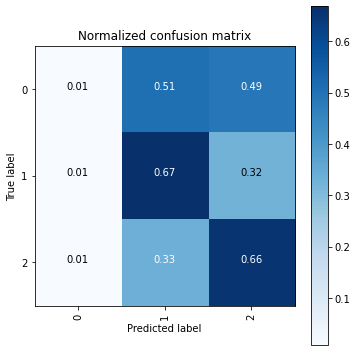

In [30]:
cnf_matrix = confusion_matrix(y_test, predicted_rf)
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True, title='Normalized confusion matrix')

plt.show()

## AdaBoost

In [31]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

range_T = [50, 100, 200, 500, 1000]




for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 2 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 3 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 4 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 5 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=6), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 6 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=7), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 7 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=8), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 8 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


For max_depth = 2 and t = 50 The accuracy is : 0.4338184338184338
For max_depth = 2 and t = 100 The accuracy is : 0.41926541926541927
For max_depth = 2 and t = 200 The accuracy is : 0.41995841995842
For max_depth = 2 and t = 500 The accuracy is : 0.4518364518364518


KeyboardInterrupt: 